## Description

This file uses trains a CNN on Urtecho's rlp5Min_SplitVariants.txt data to transfrom the input before being fed into the main CNN.

In [1]:
import CNN_4_0_pred_min as parent

/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
name = 'CNN_4_0_Pred_min'

In [3]:
file_path = '../Data/rlp5Min_SplitVariants.txt'

df = parent.load_and_preprocess_data(file_path)

In [4]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9424 - val_loss: 1.0475
Epoch 2/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9516 - val_loss: 0.6420
Epoch 3/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6043 - val_loss: 0.5164
Epoch 4/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4851 - val_loss: 0.4369
Epoch 5/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3912 - val_loss: 0.4121
Epoch 6/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3429 - val_loss: 0.3642
Epoch 7/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2621 - val_loss: 0.3174
Epoch 8/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2615 - val_loss: 0.3840
Epoch 9/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2475 - val_loss: 0.3080
Epoch 10/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1993 - val_loss: 0.3100
Epoch 11/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1526 - val_loss: 0.2969
Epoch 12/150
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


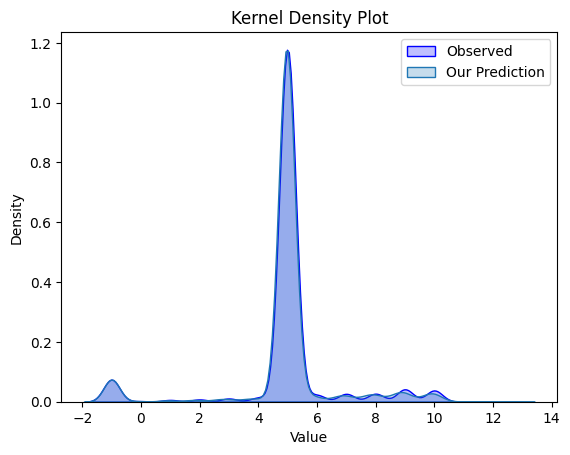

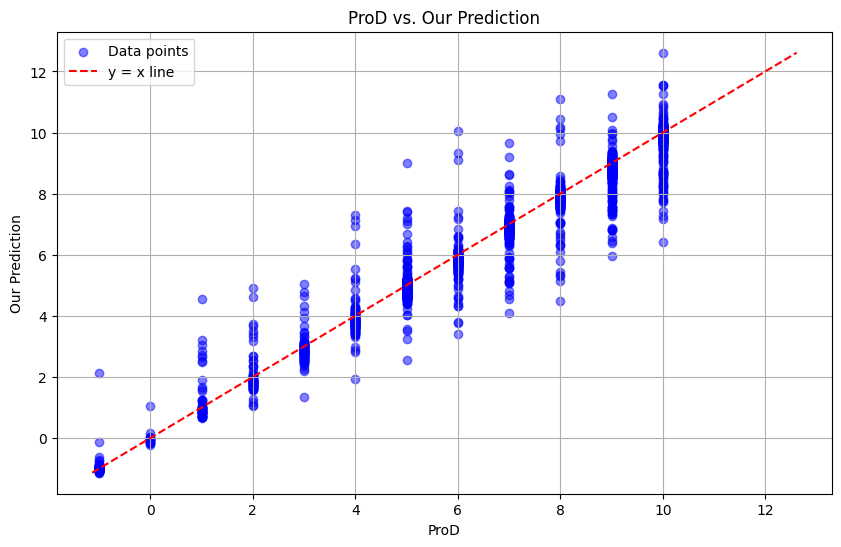

In [7]:
predicted = parent.load_and_predict(name, X)
observed = df['ProD_pred'].values

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))

In [8]:
loss

0.29039788246154785